# Árboles y random forest para regresión y clasificación

## Pasos iniciales

Comenzamos con unos imports de corte general que se usarán a lo largo de todo el trabajo, así como importando los datos en un dataframe inicial.

In [1]:
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt 
import time

df = pd.read_csv('data/housing_train.csv')

print(df.shape)

(1460, 81)


## I. Análisis descriptivo de los datos

Ahora que ya tenemos nuestro DataFrame inicial construido vamos a realizar un análisis descriptivo de estos.

Empezamos listando todas las variables, tanto numéricas como categóricas.
Nos sirve para ver el número de valores missing por variable.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Variables numéricas**

Realizamos un análisis estadístico que muestra las características principales de las variables numéricas tales como la media, la desviación estándar, valores máximos y mínimos y diversos percentiles.

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Variables categóricas**

Mostramos los posibles valores de las variables categóricas, así como su frecuencia absoluta. También contamos el número de valores missing de cada variable categórica.

In [4]:
categorical_variables = df.select_dtypes(include='object').columns

discrete_missing_values = df.select_dtypes(include='object').isnull().sum()

for cat_v in categorical_variables:
    print('**********************')
    discrete_values = df[cat_v].value_counts()
    discrete_values['missing'] = discrete_missing_values[cat_v]
    discrete_values = pd.DataFrame(discrete_values)
    print(discrete_values)

**********************
         MSZoning
RL           1151
RM            218
FV             65
RH             16
C (all)        10
missing         0
**********************
         Street
Pave       1454
Grvl          6
missing       0
**********************
         Alley
Grvl        50
Pave        41
missing   1369
**********************
         LotShape
Reg           925
IR1           484
IR2            41
IR3            10
missing         0
**********************
         LandContour
Lvl             1311
Bnk               63
HLS               50
Low               36
missing            0
**********************
         Utilities
AllPub        1459
NoSeWa           1
missing          0
**********************
         LotConfig
Inside        1052
Corner         263
CulDSac         94
FR2             47
FR3              4
missing          0
**********************
         LandSlope
Gtl           1382
Mod             65
Sev             13
missing          0
**********************
     

Una vez realizado un estudio preliminar de las variables, procedemos a calcular la matriz de correlaciones entre las variables numéricas.

In [5]:
corrMatrix = df.corr()
corrMatrix.style.background_gradient(cmap='bwr').set_precision(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000,0.011,-0.011,-0.033,-0.028,0.013,-0.013,-0.022,-0.050,-0.005,-0.006,-0.008,-0.015,0.010,0.006,-0.044,0.008,0.002,-0.020,0.006,0.007,0.038,0.003,0.027,-0.020,0.000,0.017,0.018,-0.030,-0.000,0.003,-0.047,0.001,0.057,-0.006,0.021,0.001,-0.022
MSSubClass,0.011,1.000,-0.386,-0.140,0.033,-0.059,0.028,0.041,0.023,-0.070,-0.066,-0.141,-0.239,-0.252,0.308,0.046,0.075,0.003,-0.002,0.132,0.177,-0.023,0.282,0.040,-0.046,0.085,-0.040,-0.099,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,-0.011,-0.386,1.000,0.426,0.252,-0.059,0.123,0.089,0.193,0.234,0.050,0.133,0.392,0.457,0.080,0.038,0.403,0.101,-0.007,0.199,0.054,0.263,-0.006,0.352,0.267,0.070,0.286,0.345,0.089,0.152,0.011,0.070,0.041,0.206,0.003,0.011,0.007,0.352
LotArea,-0.033,-0.140,0.426,1.000,0.106,-0.006,0.014,0.014,0.104,0.214,0.111,-0.003,0.261,0.299,0.051,0.005,0.263,0.158,0.048,0.126,0.014,0.120,-0.018,0.190,0.271,-0.025,0.155,0.180,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.264
OverallQual,-0.028,0.033,0.252,0.106,1.000,-0.092,0.572,0.551,0.412,0.240,-0.059,0.308,0.538,0.476,0.295,-0.030,0.593,0.111,-0.040,0.551,0.273,0.102,-0.184,0.427,0.397,0.548,0.601,0.562,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791
OverallCond,0.013,-0.059,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.128,-0.046,0.040,-0.137,-0.171,-0.144,0.029,0.025,-0.080,-0.055,0.118,-0.194,-0.061,0.013,-0.087,-0.058,-0.024,-0.324,-0.186,-0.152,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.078
YearBuilt,-0.013,0.028,0.123,0.014,0.572,-0.376,1.000,0.593,0.316,0.250,-0.049,0.149,0.391,0.282,0.010,-0.184,0.199,0.188,-0.038,0.468,0.243,-0.071,-0.175,0.096,0.148,0.826,0.538,0.479,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.523
YearRemodAdd,-0.022,0.041,0.089,0.014,0.551,0.074,0.593,1.000,0.180,0.128,-0.068,0.181,0.291,0.240,0.140,-0.062,0.287,0.119,-0.012,0.439,0.183,-0.041,-0.150,0.192,0.113,0.642,0.421,0.372,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036,0.507
MasVnrArea,-0.050,0.023,0.193,0.104,0.412,-0.128,0.316,0.180,1.000,0.265,-0.072,0.114,0.364,0.345,0.175,-0.069,0.391,0.085,0.027,0.277,0.201,0.103,-0.038,0.281,0.249,0.253,0.364,0.373,0.160,0.126,-0.110,0.019,0.061,0.012,-0.030,-0.006,-0.008,0.477
BsmtFinSF1,-0.005,-0.070,0.234,0.214,0.240,-0.046,0.250,0.128,0.265,1.000,-0.050,-0.495,0.522,0.446,-0.137,-0.065,0.208,0.649,0.067,0.059,0.004,-0.107,-0.081,0.044,0.260,0.153,0.224,0.297,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.386


Procedemos ahora al estudio de la matriz de correlaciones. Gracias a esta, obtendremos las parejas con mayor correlación entre sí (más de 0.75 en valor absoluto de correlación).

In [6]:
dfCorrMatrix = pd.DataFrame(corrMatrix)
dfCorrMatrixVariables = dfCorrMatrix.columns

x_size, y_size = dfCorrMatrix.shape

# solo tenemos en cuenta la mitad superior a la diagonal (ya que es simétrica)
highly_correlated = []
for i in range(x_size):
    for j in range(i+1, y_size):
        if abs(dfCorrMatrix.iloc[i][j]) > 0.75:
            highly_correlated.append([dfCorrMatrixVariables[i], dfCorrMatrixVariables[j], dfCorrMatrix.iloc[i][j]])
        
highly_correlated = pd.DataFrame(highly_correlated, columns=('Var1', 'Var2', 'Correlation'))
highly_correlated = highly_correlated.sort_values(by='Correlation', ascending = False)
highly_correlated

,Var1,Var2,Correlation
4,GarageCars,GarageArea,0.882475
1,YearBuilt,GarageYrBlt,0.825667
3,GrLivArea,TotRmsAbvGrd,0.825489
2,TotalBsmtSF,1stFlrSF,0.819530
0,OverallQual,SalePrice,0.790982


Si detectamos una correlación mayor a 0.75 entre dos variables independientes, eliminaremos una de estas variables independientes con el fin de que ese grupo de variables que representan un mismo concepto no se vea sobrerrepresentado en los modelos.

Por el contrario, queremos resaltar el buen indicador que es tener variables independientes altamente relacionadas con la variable dependiente, como ocurre por ejemplo con OverallQual y SalePrice.

In [7]:
# nos quedamos solo con las parejas altamente correladas entre variables independientes
ind_high_corr = highly_correlated[~(highly_correlated['Var1']=='SalePrice')\
                                  & ~(highly_correlated['Var2']=='SalePrice') ]
ind_high_corr

,Var1,Var2,Correlation
4,GarageCars,GarageArea,0.882475
1,YearBuilt,GarageYrBlt,0.825667
3,GrLivArea,TotRmsAbvGrd,0.825489
2,TotalBsmtSF,1stFlrSF,0.819530


Como podemos ver en la celda de arriba, contamos con varias variables independientes fuertemente correladas entre sí. Esto supone un potencial problema ya que, indica que estas parejas de variables representan, en gran medida, las mismas nociones del conjunto de datos y , si ambas fueran seleccionadas en los modelos, dicha característica se vería representada. Es por ello que debemos eliminar una de las variables de cada pareja.

Una de las medidas que se tendrá en cuenta a la hora de decidir qué variable descartar, será la correlación con la variable independendiente SalePrice, ya que una alta correlación esta nos será de gran utilidad a la hora de modelizarla.

* GarageCars vs GarageArea: si bien las dos cuentan con una alta correlación con SalePrice, GarageArea nos será especialmente útil a la hora de tratar los valores missing en las variables categóricas relacionadas con el garaje ya que si su valor es 0, implica que la vivienda no tiene garaje. Es por esto que descartaremos GarageCars.
* YearBuilt vs GarageYrBlt: YearBuilt cuenta con una mayor correlación con SalePrice, es por ello que descartaremos GarageYrBlt
* GrLivArea vs TotRmsAbvGrd: GrLivArea cuenta con una mayor correlación con SalePrice, es por ello que descartaremos TotRmsAbvGrd
* TotalBsmtSF vs 1stFlrSF: TotalBsmtSF cuenta con una mayor correlación con SalePrice, es por ello que descartaremos 1stFlrSF

In [8]:
df.drop(columns = ['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF'], inplace = True)

Finalizamos este análisis descriptivo resaltando lo útil que ha sido para obtener una idea general del conjunto de datos con el que vamos a trabajar. Además nos ha servido para eliminar variables independientes fuertemente correladas que podrían potencialmente distorsionar nuestros modelos.

## II. Tratamiento de valores missing

In [9]:
var_missing = df.isnull().sum()

In [10]:
var_missing = df.isnull().sum()
df_missing = pd.DataFrame()
df_missing['n_missing'] = var_missing
df_missing = df_missing[df_missing['n_missing'] > 0].sort_values(by='n_missing', ascending = False)
df_missing

,n_missing
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageFinish,81
GarageQual,81
GarageCond,81


Aplicaremos un tratamiento y razonamiento para valores missing de las siguientes variables:
* PoolQC
* FireplaceQu
* MiscFeature
* GarageCond, GarageFinish, GarageQual, GarageType
* MasVnrArea, MasVnrType
* Alley
* Fence
* LotFrontage

In [11]:
# Creamos una copia de df donde aplicaremos el tratamiento de valores missing

df_m = df.copy()

PoolQC representa la calidad de la piscina, mientras que PoolArea representa el área de la piscina en metros cuadrados. Como es lógico, si no hay piscina no se puede determinar la calidad de esta, es por ello que el tratamiento a seguir será el siguiente.

* Si PoolArea == 0, entonces PoolQC = 'No Pool'
* El resto de valores missing se les imputará a la moda. En caso de que haya varias modas se tomará una de ellas.

Este tratamiento motivado por el alto número de casas sin piscina, 1453, como se puede ver en el cálculo de la siguiente celda.

In [12]:
pd.DataFrame(df_m.groupby(['PoolArea']).count()['Id']).query('PoolArea == 0')

,Id
PoolArea,
0,1453


In [13]:
# Si PoolArea == 0, entonces PoolQC = 'No Pool'
df_m['PoolQC'][(df_m['PoolQC'].isnull()) & (df_m['PoolArea']==0)] = 'No Pool'

In [14]:
# Si no, entonces los valores missing de PoolQC se imputarán a la moda
df_m['PoolQC'].fillna(df['PoolQC'].mode()[0], inplace = True)

In [15]:
# Estado final de la variable PoolQC tras el tratamiento de valores missing
pd.DataFrame(df_m['PoolQC'].value_counts())

,PoolQC
No Pool,1453
Gd,3
Ex,2
Fa,2


El tratamiento para FireplaceQu será análogo al de PoolQC.

FireplaceQu representa la calidad de las chimeneas, mientras que Fireplaces representa elnúmero de chimeneas. Como es lógico, si no hay chimeneas no se puede determinar la calidad de estas, es por ello que el tratamiento a seguir será el siguiente.

* Si Fireplaces == 0, entonces FireplaceQu = 'No Fireplaces'
* El resto de valores missing se les imputará a la moda. En caso de que haya varias modas se tomará una de ellas.

Este tratamiento motivado por el alto número de casas sin chimeneas, 690, como se puede ver en el cálculo de la siguiente celda.

In [16]:
pd.DataFrame(df_m.groupby(['Fireplaces']).count()['Id']).query('Fireplaces == 0')

,Id
Fireplaces,
0,690


In [17]:
# Si Fireplaces == 0, entonces FireplaceQu = 'No Fireplaces'
df_m['FireplaceQu'][(df_m['FireplaceQu'].isnull()) & (df_m['Fireplaces']==0)] = 'No Fireplaces'

In [18]:
# Si no, entonces los valores missing de PoolQC se imputarán a la moda
df_m['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace = True)

In [19]:
# Estado final de la variable FireplaceQu tras el tratamiento de valores missing
pd.DataFrame(df_m['FireplaceQu'].value_counts())

,FireplaceQu
No Fireplaces,690
Gd,380
TA,313
Fa,33
Ex,24
Po,20


El tratamiento para MiscFeature será análogo a los anteriores.

MiscFeature representa características de diversa índole no cubiertas en otras categorías, mientras que MiscVal representa el valor en dólares de dichas características. Asumimos que si el valor de la miscelánea es 0, entonces no hay miscelánea. Es por ello que el tratamiento a seguir será el siguiente.

* Si MiscVal == 0, entonces MiscFeature = 'No Miscellany'
* El resto de valores missing se les imputará a la moda. En caso de que haya varias modas se tomará una de ellas.

Este tratamiento motivado por el alto número de casas sin miscelánea, 1408, como se puede ver en el cálculo de la siguiente celda.

In [20]:
pd.DataFrame(df_m.groupby(['MiscVal']).count()['Id']).query('MiscVal == 0')

,Id
MiscVal,
0,1408


In [21]:
# Si MiscVal == 0, entonces MiscFeature = 'No Miscellany'
df_m['MiscFeature'][(df_m['MiscFeature'].isnull()) & (df_m['MiscVal']==0)] = 'No Miscellany'

In [22]:
# Si no, entonces los valores missing de MiscFeature se imputarán a la moda
df_m['MiscFeature'].fillna(df['MiscFeature'].mode()[0], inplace = True)

In [23]:
# Estado final de la variable FireplaceQu tras el tratamiento de valores missing
pd.DataFrame(df_m['MiscFeature'].value_counts())

,MiscFeature
No Miscellany,1406
Shed,49
Othr,2
Gar2,2
TenC,1


Estudiemos ahora las variables relacionadas con los garajes de las casas: GarageCond, GarageYrBlt, GarageFinish, GarageQual, GarageType

Todas ellas se refieren a algún aspecto particular del garaje de la casa, por lo que es claro que si las casas no cuentan con garajes, los valores missing estarán representando esta característica. Es por ello que el tratamiento a seguir será el siguiente.

* Si GarageArea == 0, entonces todas estas variables tendrán el valor 'No Garages'
* El resto de valores missing se les imputará a la moda. En caso de que haya varias modas se tomará una de ellas.

Este tratamiento motivado por el significativo número de casas sin garaje, 81, que explican casi en la totalidad el número de valores missing de estas variables.

In [24]:
pd.DataFrame(df_m.groupby(['GarageArea']).count()['Id']).query('GarageArea == 0')

,Id
GarageArea,
0,81


Tratamiento de GarageCond:

In [25]:
# Si GarageArea == 0, entonces GarageCond = 'No Garages'
df_m['GarageCond'][(df_m['GarageCond'].isnull()) & (df_m['GarageArea']==0)] = 'No Garages'

In [26]:
# Si no, entonces los valores missing de GarageCond se imputarán a la moda
df_m['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace = True)

In [27]:
# Estado final de la variable GarageCond tras el tratamiento de valores missing
pd.DataFrame(df_m['GarageCond'].value_counts())

,GarageCond
TA,1326
No Garages,81
Fa,35
Gd,9
Po,7
Ex,2


Tratamiento de GarageFinish:

In [28]:
# Si GarageArea == 0, entonces GarageFinish = 'No Garages'
df_m['GarageFinish'][(df_m['GarageFinish'].isnull()) & (df_m['GarageArea']==0)] = 'No Garages'

In [29]:
# Si no, entonces los valores missing de GarageQual se imputarán a la moda
df_m['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace = True)

In [30]:
# Estado final de la variable GarageFinish tras el tratamiento de valores missing
pd.DataFrame(df_m['GarageFinish'].value_counts())

,GarageFinish
Unf,605
RFn,422
Fin,352
No Garages,81


Tratamiento de GarageQual:

In [31]:
# Si GarageArea == 0, entonces GarageQual = 'No Garages'
df_m['GarageQual'][(df_m['GarageQual'].isnull()) & (df_m['GarageArea']==0)] = 'No Garages'

In [32]:
# Si no, entonces los valores missing de GarageQual se imputarán a la moda
df_m['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace = True)

In [33]:
# Estado final de la variable GarageQual tras el tratamiento de valores missing
pd.DataFrame(df_m['GarageQual'].value_counts())

,GarageQual
TA,1311
No Garages,81
Fa,48
Gd,14
Ex,3
Po,3


Tratamiento de GarageType:

In [34]:
# Si GarageArea == 0, entonces GarageType = 'No Garages'
df_m['GarageType'][(df_m['GarageType'].isnull()) & (df_m['GarageArea']==0)] = 'No Garages'

In [35]:
# Si no, entonces los valores missing de GarageType se imputarán a la moda
df_m['GarageType'].fillna(df['GarageType'].mode()[0], inplace = True)

In [36]:
# Estado final de la variable GarageType tras el tratamiento de valores missing
pd.DataFrame(df_m['GarageType'].value_counts())

,GarageType
Attchd,870
Detchd,387
BuiltIn,88
No Garages,81
Basment,19
CarPort,9
2Types,6


Respecto a las variables MasVnrType y MasVnrArea, las cuales representan el tipo y el área en pies cuadrados del revestimiento de la mampostería, encontramos que tienen 8 valores missing.

Estos se pueden deber a que no se tenga mampostería por lo que los valores missing de MasVnrArea se reemplazarán por 0 y los valores missing de MasVnrType por 'None'

In [37]:
print(df_m['MasVnrArea'].isnull().sum())
print(df_m['MasVnrType'].isnull().sum())

8
8


In [38]:
df_m['MasVnrArea'][df_m['MasVnrArea'].isnull()] = 0
df_m['MasVnrType'][df_m['MasVnrType'].isnull()] = 'None'

In [39]:
# Estado final de las variable MasVnrArea y MasVnrType tras el tratamiento de valores missing
print(pd.DataFrame(df_m['MasVnrArea'].value_counts()))
print(pd.DataFrame(df_m['MasVnrType'].value_counts()))

       MasVnrArea
0.0           869
72.0            8
180.0           8
108.0           8
120.0           7
...           ...
651.0           1
337.0           1
415.0           1
293.0           1
621.0           1

[327 rows x 1 columns]
         MasVnrType
None            872
BrkFace         445
Stone           128
BrkCmn           15


Respecto a las variables Alley, con 1369 valores missing, y Fence, con 1179 valores missing se ha decidido eliminarlas. El motivo es que, a diferencia de PoolQC, FireplaceQu, MiscFeature y las respectivas a los garajes, no tenemos una variable auxiliar que nos pueda ayudar a discernir entre valores missing que realmente son missing y valores missing que representan la falta de una entrada al callejón o de una verja.

Nótese que los porcentajes de valores missing son de un 93.8% y un 80.8% respectivamente, por lo que si no se es capaz de diferenciar los valores missing de aquellos que puedan tener un significado, estas variables resultan estar muy pobremente informadas.

Adicionalmente, la variable LotFrontage ha sido también descartada siguiendo el consejo de desechar aquellas variables con más de un 10% de valores missing (tiene 259, es decir, un 17.8% de valores missing).

In [40]:
df_m.drop(columns = ['Alley', 'Fence', 'LotFrontage'], inplace = True)

Por último, rellenaremos las demás variables con la media, si es numérica, o la moda, si es categórica:

In [41]:
for col in df_m:
    
    # Averiguamos el tipo de dato (dtype) de cada columna:
    
    dt = df_m[col].dtype 
    
    # Comprobamos si es una variable numérica o categórica:
    
    if dt == int or dt == float:
        df_m[col]=df_m[col].fillna(df_m[col].mean())
    elif dt==object:
        df_m[col]=df_m[col].fillna(df_m[col].mode()[0])
        
# Verificamos que todos los nulos han sido tratados, y el conjunto de datos está listo para procesar:

df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## III. Problema de regresión

Antes de comenzar, hacemos todos los imports necesarios para llevar a cabo el problema de regresión, tanto con árboles de decisión como con random forest.

In [42]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


Procedemos ahora a la separación en los conjuntos de entrenamiento y test para el correcto desarrollo de ambos modelos.

In [43]:
# Antes de la separación entrenamiento/test debemos separar las variables dependientes de la independiente
# x contendrá las variables dependientes de cada registro sobre las cuales basaremos nuestra regresión,
# y contendrá la variable independiente de cada registro, la cual será la variable a predecir
x = df_m.drop(columns = ['SalePrice'])
y = df_m.SalePrice

# Separamos en conjunto de entrenamiento y test. Además, convertimos las categorías de las
# variables categóricas en nuevas variables, en este caso, numéricas,
# ya que scikit no acepta variables categóricas para los árboles de regresión

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

Antes de entrenar el modelo, es necesario aplicar el one-hot-encoding ya que en estos datos tenemos variables categóricas.
Consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas.
La clase ColumnTransformer permite combinar múltiples transformaciones de preprocesado, especificando a qué columnas se aplica cada una
y con la clase OneHotEncoder se binarizan dichas variables. Lo aplicamos a las variables categoricas.

In [44]:
# One-hot-encoding de las variables categóricas
# ==============================================================================
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('scale', StandardScaler(), numeric_cols),
                     ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough',
               )

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(x_train)
X_test_prep  = preprocessor.transform(x_test)

# Convertir el output del ColumnTransformer en dataframe y añadir nombre columnas
# ==============================================================================
# Nombre de todas las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

# Conversión a dataframe
x_train = pd.DataFrame(X_train_prep.todense(), columns=labels)
x_test  = pd.DataFrame(X_test_prep.todense(), columns=labels)
x_train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,-5.570126e-17,5.665179e-17,4.191852e-17,-2.560737e-16,1.434355e-16,-1.404888e-15,4.638223e-15,-8.091416e-17,3.250824e-17,-5.094859e-17,...,0.003425,0.083048,0.001712,0.866438,0.065925,0.003425,0.005993,0.015411,0.825342,0.083904
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,...,0.058445,0.276073,0.041363,0.340326,0.248257,0.058445,0.077216,0.123233,0.379837,0.277363
min,-1.716668e+00,-8.667643e-01,-8.730685e-01,-3.746488e+00,-4.109739e+00,-3.227597e+00,-1.683818e+00,-5.978887e-01,-9.719957e-01,-2.855041e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.705699e-01,-8.667643e-01,-2.884669e-01,-8.204446e-01,-5.241741e-01,-5.859221e-01,-9.118065e-01,-5.978887e-01,-9.719957e-01,-2.855041e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.751372e-03,-1.611086e-01,-1.013172e-01,-8.893368e-02,-5.241741e-01,3.373017e-02,4.392138e-01,-5.978887e-01,-1.340758e-01,-2.855041e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.721929e-01,3.093285e-01,9.394519e-02,6.425772e-01,3.722173e-01,9.795152e-01,9.217210e-01,3.634694e-01,5.992403e-01,-2.855041e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.714763e+00,3.131951e+00,1.901998e+01,2.837110e+00,3.061391e+00,1.273035e+00,1.211225e+00,7.382542e+00,1.132767e+01,6.840653e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Problema de regresión con árboles de decisión**

El primer modelo a implementar es la regresión basada en árboles de decisión.

Primero, buscaremos los mejores parámetros para el árbols usando un Grid Search con validación cruzada con 10 folds.

In [45]:
# Creamos el árbol
arbol = DecisionTreeRegressor(random_state=42)

# Buscamos los mejores parámetros para el árbol:.
arbol_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

# Agregamos un temporizador que devolverá el tiempo que tarda en encontrar los mejores parámetros

start = time.time()

# Especificamos el número de divisiones que realizará la comprobación k-fold, en este caso, hemos elegido k=10
gs_arbol = GridSearchCV(arbol,arbol_params,cv=10)
gs_arbol.fit(x_train,y_train)
opt_tree_parameters = gs_arbol.best_params_
print('Parámetros óptimos para el árbol de decisión usado para la regresión:')
print (opt_tree_parameters)
opt_max_depth = opt_tree_parameters['max_depth']
opt_min_samples_leaf = opt_tree_parameters['min_samples_leaf']

# Termina el temporizador

end = time.time()

topt_arbol_reg = end-start
print ('El tiempo de optimización ha sido: ',topt_arbol_reg,' s')

Parámetros óptimos para el árbol de decisión usado para la regresión:
{'max_depth': 11, 'min_samples_leaf': 12}
El tiempo de optimización ha sido:  70.84609699249268  s


Ahora que ya hemos obtenido los mejores parámetros para nuestro modelo, lo entrenamos con dichos parámetros, obteniendo así el mejor árbol posible.

Profundidad del árbol: 11
Número de nodos terminales: 78
El tiempo total de entrenamiento ha sido:  0.019507169723510742  s


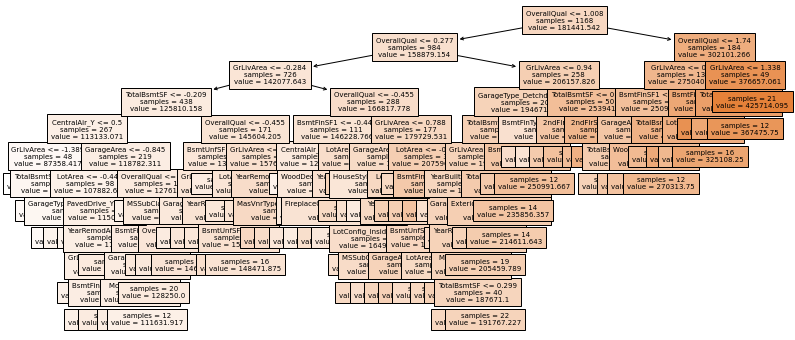

In [46]:
# Entrenamos el árbol con los parámetros óptimos:

mejorArbol = DecisionTreeRegressor(max_depth=opt_max_depth, min_samples_leaf=opt_min_samples_leaf,random_state=42)

start = time.time()

modelo = mejorArbol.fit(x_train,y_train)

end = time.time()

t_arbol_reg =end-start

# Representamos el árbol

fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")
print('El tiempo total de entrenamiento ha sido: ', t_arbol_reg,' s')


plot = tree.plot_tree(
            decision_tree = modelo,
            feature_names = x_train.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

Una vez tenemos el modelo entrenado, vamos a usarlo para predecir la variable objetivo en el conjunto de test.

Además comprobamos el rendimiento de nuestro modelo usando la métrica MSE.

In [47]:
# Vamos a predecir la variable objetivo:
y_pred=modelo.predict(x_test)

# Y comprobamos el error cometido con el estimador MSE (Mean Squared Error)
error_arbol = mean_squared_error(y_pred,y_test)

Resultados de la regresión con árboles de decisión:

El módelo toma como variable con mayor peso la OverallQual, la cual indica la calidad general de la casa. Después, las variables del garaje son las que más peso tienen a la hora de determinar el precio de la vivienda.

A pesar de esto, el error cometido, mostrado por el MSE, es muy alto

In [48]:
print('Error cometido por el árbol de decisión (MSE):',error_arbol)

Error cometido por el árbol de decisión (MSE): 1386545268.1814628


**Problema de regresión con Random Forest**

El segundo modelo a implementar se basa en el algoritmo Random Forest.

De nuevo, nos basaremos en una Grid Search para la obtención de los parámetros óptimos.

In [49]:
# Creamos el modelo
rforest0 = RandomForestRegressor(random_state=42)

# Averiguamos los parámetros óptimos con k-fold, k = 3

start=time.time()

rforest_params = {'n_estimators': [100], 
              'max_depth': [2,4,6,8],         
              'min_samples_split': [2,3,4,5]
                 }

rforest_gs = GridSearchCV(estimator=rforest0,
                          param_grid=rforest_params,
                          n_jobs     = multiprocessing.cpu_count() - 1,
                          cv= 3,
                          return_train_score=True)
rforest_gs.fit(x_train, y_train)
rf_opt_parameters = rforest_gs.best_params_
print('Parámetros óptimos para el Random Forest usado para la regresión:')
print(rf_opt_parameters)

opt_max_depth = rf_opt_parameters['max_depth']
opt_min_samples_split = rf_opt_parameters['min_samples_split']
opt_n_estimators = rf_opt_parameters['n_estimators']

end=time.time()
topt_RF_reg = end-start

print('El tiempo de ejecución ha sido: ',topt_RF_reg, ' s')

Parámetros óptimos para el Random Forest usado para la regresión:
{'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 100}
El tiempo de ejecución ha sido:  10.734166145324707  s


Ahora que ya conocemos los parámetros óptimos para el nuestro modelo de regresión basado en Random Forest, lo entrenamos.

In [50]:
rforest1 = RandomForestRegressor(n_estimators=opt_n_estimators,
                                 max_depth=opt_max_depth,
                                 min_samples_split=opt_min_samples_split,
                                 random_state=42)

# Entrenamos el modelo
start=time.time()

rmodelo = rforest1.fit(x_train,y_train)

end=time.time()

t_RF_reg=end-start

Una vez tenemos el modelo entrenado, vamos a usarlo para predecir la variable objetivo en el conjunto de test.

Además, evaluaremos su rendimiento con la métrica MSE.

Resultado de la regresión con Random Forest:

In [51]:
# Realizamos la predicción

y_pred = rmodelo.predict(x_test)

# Comprobamos el error con mse:
error_randomf = mean_squared_error(y_pred,y_test)

print('Error cometido por el Random Forest (MSE):', error_randomf)
print('El tiempo de entrenamiento ha sido: ',t_RF_reg,' s')

Error cometido por el Random Forest (MSE): 901654011.8174634
El tiempo de entrenamiento ha sido:  1.196593999862671  s


**Comparación de resultados**

La comparación entre los resultados obtenidos en el problema de regresión usando árboles y Random Forest no dan lugar a dudas: el algoritmo Random Forest arroja unos mejores resultados.

Para esta comparación nos hemos basado en tres medidas de evaluación: el error cometido (calculado vía MSE), el tiempo de optimización de parámetros y el tiempo de entrenamiento con dichos parámetros óptimos. Debajo, hemos adjuntado los resultados donde se puede ver que el Random Forest tarda solo 10 segundos en encontrar sus parámetros óptimos, frente a los 70 segundos del árbol, y su resultado tiene un 66% del error que obtiene los árboles. En particular, nos gustaría resaltar que la mejora en el tiempo de entrenamiento se debe al uso del comando multiprocessing.cpu_count(), el cual aprovecha todos los núcleos de la CPU del ordenador. Antes de la implementación de este comando los tiempos de optimización de parámetros para el Random Forest eran mucho más elevados.

No obstante, a pesar de que el Random Forest ha rendido notablemente mejor que los árboles, los resultados se antojan extremdamente pobres, mostrando, en el mejor de los casos, errores de 901 millones de dólares (cuando los precios de las viviendas se encuentran alrededor de 200.000 dólares).

Es por esto que pensamos que ninguno de estos dos métodos son apropiados para la regresión del precio de las viviendas en este conexto.

In [52]:
print ('Error árbol de decisión: ', error_arbol)
print('Error random forest con n=100: ', error_randomf)
print('*******************************************************')
print('El tiempo de optimización de parámetros del árbol de decisión ha sido de: ',topt_arbol_reg,' s')
print('El tiempo de optimización de parámetros de Random Forest ha sido de: ',topt_RF_reg,' s')
print('*******************************************************')
print('El tiempo de entrenamiento del árbol de decisión ha sido de: ',t_arbol_reg,' s')
print('El tiempo de entrenamiento de Random Forest ha sido de: ',t_RF_reg,' s')

Error árbol de decisión:  1386545268.1814628
Error random forest con n=100:  901654011.8174634
*******************************************************
El tiempo de optimización de parámetros del árbol de decisión ha sido de:  70.84609699249268  s
El tiempo de optimización de parámetros de Random Forest ha sido de:  10.734166145324707  s
*******************************************************
El tiempo de entrenamiento del árbol de decisión ha sido de:  0.019507169723510742  s
El tiempo de entrenamiento de Random Forest ha sido de:  1.196593999862671  s


## IV. Problema de clasificación.

Para el problema de clasificación necesitaremos segmentar los datos de entrenamiento en los grupos que posteriormente querremos clasificar. Los datos se segmentaran dependiendo de la variable independiente SalePrice en los siguientes dos grupos.

* Grupo 1 si SalePrice <= 100.000
* Grupo 2 si SalePrice > 100.000

Nótese que en el enunciado original se proponía un tercer grupo para aquellas casas que valieran más de 500.000, pero al solo haber 9 registros de dicho grupo en el conjunto de entrenamiento, hemos decidido juntarlos con el grupo 2 para una clasificación más eficiente y balanceada.

A continuación, se tratan los datos para que los dos algoritmos que se van a utilizar, árboles de clasificación y random forest, se entrenen correctamente.

In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import multiprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Lo primero que tenemos que hacer es dividir la variable SalePrice en 2 grupos

df_m['Grupos']=pd.cut(x=df_m['SalePrice'],bins=[0,100000,800000],labels=['Grupo1','Grupo2'])

# Vemos cuantos datos pertenecen a cada grupo

print('Número de observaciones en el conjunto de entrenamiento de cada grupo:')
print('Grupo 1 -->',(df_m['Grupos']=='Grupo1').sum())
print('Grupo 2 -->',(df_m['Grupos']=='Grupo2').sum())
print('Total de observaciones -->', df_m['Grupos'].count()) 

# Separamos los datos en entrenamiento y test:

x=df_m.drop(columns=['Grupos','SalePrice'])
y=df_m['Grupos']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# One-hot-encoding de las variables categóricas
# ==============================================================================
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('scale', StandardScaler(), numeric_cols),
                     ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough',
               )

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(x_train)
X_test_prep  = preprocessor.transform(x_test)

# Convertir el output del ColumnTransformer en dataframe y añadir nombre columnas
# ==============================================================================
# Nombre de todas las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

# Conversión a dataframe
x_train = pd.DataFrame(X_train_prep.todense(), columns=labels)
x_test  = pd.DataFrame(X_test_prep.todense(), columns=labels)
x_train.describe()

Número de observaciones en el conjunto de entrenamiento de cada grupo:
Grupo 1 --> 123
Grupo 2 --> 1337
Total de observaciones --> 1460


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,-5.570126e-17,5.665179e-17,4.191852e-17,-2.560737e-16,1.434355e-16,-1.404888e-15,4.638223e-15,-8.091416e-17,3.250824e-17,-5.094859e-17,...,0.003425,0.083048,0.001712,0.866438,0.065925,0.003425,0.005993,0.015411,0.825342,0.083904
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,...,0.058445,0.276073,0.041363,0.340326,0.248257,0.058445,0.077216,0.123233,0.379837,0.277363
min,-1.716668e+00,-8.667643e-01,-8.730685e-01,-3.746488e+00,-4.109739e+00,-3.227597e+00,-1.683818e+00,-5.978887e-01,-9.719957e-01,-2.855041e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.705699e-01,-8.667643e-01,-2.884669e-01,-8.204446e-01,-5.241741e-01,-5.859221e-01,-9.118065e-01,-5.978887e-01,-9.719957e-01,-2.855041e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.751372e-03,-1.611086e-01,-1.013172e-01,-8.893368e-02,-5.241741e-01,3.373017e-02,4.392138e-01,-5.978887e-01,-1.340758e-01,-2.855041e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.721929e-01,3.093285e-01,9.394519e-02,6.425772e-01,3.722173e-01,9.795152e-01,9.217210e-01,3.634694e-01,5.992403e-01,-2.855041e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.714763e+00,3.131951e+00,1.901998e+01,2.837110e+00,3.061391e+00,1.273035e+00,1.211225e+00,7.382542e+00,1.132767e+01,6.840653e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Problema de clasificación con árboles de decisión**

Vamos a crear el árbol con un parámetro típico, profundidad máxima 3 y sin especificar los demás parámetros para ver el resultado. Después optimizaremos el modelo mediante validación cruazada con GridSearchCV

Profundidad del árbol: 3
Número de nodos terminales: 8


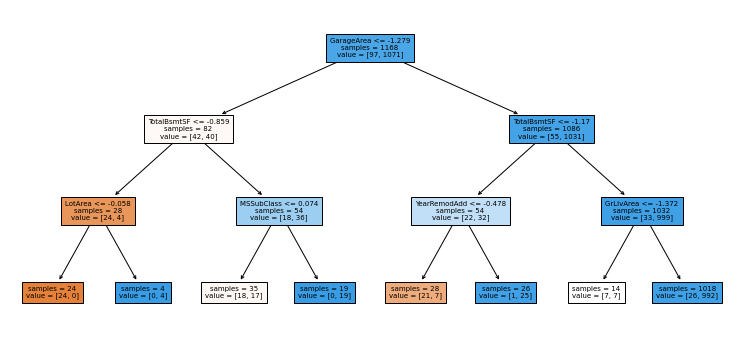

In [54]:
modelo = DecisionTreeClassifier(
            max_depth         = 3,
            criterion         = 'gini',
            random_state      = 30
          )

# Entrenamos el modelo

modelo.fit(x_train, y_train)

# Representamos el modelo

fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = tree.plot_tree(
            decision_tree = modelo,
            feature_names = x_train.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )


Una vez tenemos este modelo preliminar entrenado, probamos a usarlo para predecir y lo evaluamos con diferentes métricas. El principal objetivo es ver la mejoría en dichas métricas una vez se implementan los parámetros óptimos.

In [55]:
# Predicción y resultados

predicciones = modelo.predict(x_test)

# Creamos la matriz de confusión y la representamos

mat_confusion = confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")

# Calculamos la precisión del modelo, y las puntuaciones de las métricas recall y F1

accuracy_arbol = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
recall_arbol = recall_score(
            y_true = y_test,
            y_pred = predicciones, 
            average = 'micro'
            )
f1_arbol = f1_score(
            y_true=y_test,
            y_pred=predicciones, 
            average = 'micro'
            )
print(f"El accuracy de test es: {100 * accuracy_arbol} %")
print('La puntuación de recall es: ', recall_arbol)
print('La puntuación F1 del modelo es: ',f1_arbol)

Matriz de confusión
-------------------
[[ 15  11]
 [ 16 250]]

El accuracy de test es: 90.75342465753424 %
La puntuación de recall es:  0.9075342465753424
La puntuación F1 del modelo es:  0.9075342465753424


**Significado de las métricas**

**Accuracy Score:** Porcentaje que representa cuántos datos ha clasificado el modelo exáctamente igual que en el conjunto de test.


**Recall Score:**  La puntuación de recall es la proporción tp / (tp + fn), en la que tp es el número de positivos verdaderos y fn, falsos negativos. De manera intuitiva, podemos definir esta métrica como la habilidad del modelo para identificar todas las muestras positivas. La mejor puntuación es 1 y la peor, 0.


**F1 Score:**  Analíticamente, la puntuación F1 se define como: **2 * (precision * recall) / (precision + recall)**. Se trata                  de una media ponderada de las puntuaciones accuracy y recall. De nuevo, la mejor puntuación sería un 1 y la peor,                un 0

**Pruning con ccp_alpha:**

Ahora vamos a buscar los parámetros óptimos para el árbol basándonos en el parámetro **cost complexity parameter (ccp_alpha)**.
Este parámetro pertenece a la técnica Minimal Cost-Complexity Pruning. Una técnica top-down que elige podar aquel subarbol que presente el mayor valor de cost-complexity de entre todos los subarboles y que sea menor que ccp_alpha. A mayores valores de ccp_alpha, mayor número de nodos podados.

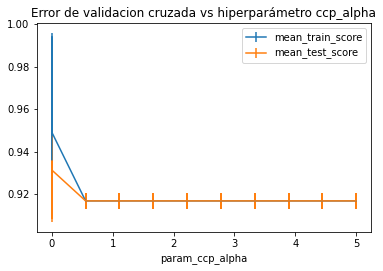

In [56]:
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10),'max_depth':np.arange(2,10,1),'min_samples_leaf':np.arange(1,20,5)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # Dejamos crecer al máximo posible el arbol antes de aplicar pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            random_state      = 30
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        n_jobs     = multiprocessing.cpu_count() - 1,
        refit      = True,
        return_train_score = True
      )

start=time.time()

grid.fit(x_train, y_train)

end=time.time()

top_arbol_cla=end-start

# Representamos la relación entre el error de validación cruzada y el hiperparámetro ccp_alpha

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

Es por ello que el mejor alpha y los parámetros óptimos son:

In [57]:
params=grid.best_params_
print(params,'\n')
print('El tiempo total de optimización de parámetros ha sido: ',top_arbol_cla,' s')

opt_ccp_alpha = params['ccp_alpha']
opt_max_depth = params['max_depth']
opt_min_samples_leaf = params['min_samples_leaf']

{'ccp_alpha': 0.0, 'max_depth': 4, 'min_samples_leaf': 16} 

El tiempo total de optimización de parámetros ha sido:  23.16266632080078  s


Ahora entrenamos el modelo con los parámetros óptimos.

Profundidad del árbol: 4
Número de nodos terminales: 10
El tiempo de entrenamiento del árbol ha sido de:  0.01927971839904785  s


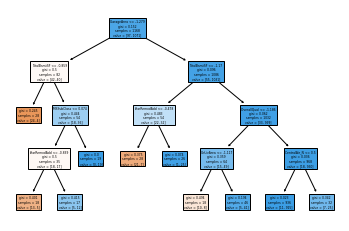

In [58]:
arbolcl = DecisionTreeClassifier(ccp_alpha=opt_ccp_alpha,
                                 max_depth=opt_max_depth,
                                 min_samples_leaf=opt_min_samples_leaf,
                                 random_state=30)

start=time.time()

modelo = arbolcl.fit(x_train,y_train)

end=time.time()

t_arbol_cla=end-start

# Representamos el árbol, sus características y el tiempo de entrenamiento

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")
print('El tiempo de entrenamiento del árbol ha sido de: ',t_arbol_cla,' s')

plot = tree.plot_tree(
            decision_tree = modelo,
            feature_names = x_train.columns,
            filled        = True,
       )

Una vez tenemos el modelo con los parámetros óptimos entrenado, procedemos a obtener los resultados de la clasificación con este árboles de decisión. Obsérvese cómo los resultados obtenidos mejoran los producidos por el primer árbol que no contaba con los parámetros optimizados.

In [59]:
# Predecimos con x_test

predicciones = modelo.predict(x_test)

# Vamos a ver la matriz de confusión

mat_confusion = confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")

# Resultados con diferentes métricas

accuracy_arbol = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
recall_arbol = recall_score(
            y_true = y_test,
            y_pred = predicciones, 
            average = 'micro'
)
f1_arbol = f1_score(
            y_true=y_test,
            y_pred=predicciones, 
            average = 'micro'
)

print(f"La precisión del modelo es: {100 * accuracy_arbol} %")
print('La puntuación de recall es: ', recall_arbol)
print('La puntuación F1 del modelo es: ',f1_arbol)

Matriz de confusión
-------------------
[[ 14  12]
 [ 11 255]]

La precisión del modelo es: 92.12328767123287 %
La puntuación de recall es:  0.9212328767123288
La puntuación F1 del modelo es:  0.9212328767123288


**Problema de clasificación con Random Forest**

En el caso de Random Forest, vamos a optimizar directamente los parámetros mediante validación cruzada:

In [60]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 42),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

start=time.time()

grid.fit(X = x_train, y = y_train)

end=time.time()

top_RF_cla=end-start

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring,'\n')
print('El tiempo total de optimización ha sido de: ', top_RF_cla,' s')

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 9, 'n_estimators': 150} : 0.9495017301884254 accuracy 

El tiempo total de optimización ha sido de:  30.398340702056885  s


Resultados de la clasificación con el modelo Random Forest con los parámetros optimizados.

In [61]:
# Entrenamos el random forest pasándole los parámetros optimizados con .best_estimator_

start=time.time()

rforest_clas = grid.best_estimator_

end=time.time()

t_RF_cla=end-start

# Realizamos las predicciones

predicciones = rforest_clas.predict(X = x_test)

# Creamos la matriz de confusión

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

# Calculamos la precisión, así como las puntuaciones recall y F1:

accuracy_rforest = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
recall_rforest = recall_score(
            y_true = y_test,
            y_pred = predicciones, 
            average = 'micro'
)
f1_rforest = f1_score(
            y_true=y_test,
            y_pred=predicciones, 
            average = 'micro'
)

# Resultados:

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")

print(f"La precisión del modelo es: {100 * accuracy_rforest} %")
print('La puntuación de recall es: ', recall_rforest)
print('La puntuación F1 del modelo es: ',f1_rforest)
print('El tiempo de entrenamiento del modelo ha sido de : ',t_RF_cla,' s')

Matriz de confusión
-------------------
[[ 10  16]
 [  1 265]]

La precisión del modelo es: 94.17808219178082 %
La puntuación de recall es:  0.9417808219178082
La puntuación F1 del modelo es:  0.9417808219178082
El tiempo de entrenamiento del modelo ha sido de :  4.982948303222656e-05  s


**Comparación de resultados**

Como podemos ver, con random forest aumentan tanto la precisión, como las puntuaciones de las métricas recall y F1:

In [62]:

print('Precisión arbol de decisión: ', accuracy_arbol, '%')
print('Precisión random forest: ', accuracy_rforest, '%',)
print('---------------------------------------------------------------')
print('Puntuación de recall del árbol de decisión: ',recall_arbol)
print('Puntuación de recall de random forest: ',recall_rforest)
print('---------------------------------------------------------------')
print('Puntuación de F1 del árbol de decisión: ',f1_arbol)
print('Puntuación de F1 de random forest: ',f1_rforest)
print('---------------------------------------------------------------')


Precisión arbol de decisión:  0.9212328767123288 %
Precisión random forest:  0.9417808219178082 %
---------------------------------------------------------------
Puntuación de recall del árbol de decisión:  0.9212328767123288
Puntuación de recall de random forest:  0.9417808219178082
---------------------------------------------------------------
Puntuación de F1 del árbol de decisión:  0.9212328767123288
Puntuación de F1 de random forest:  0.9417808219178082
---------------------------------------------------------------


Además, los tiempos de cálculo para optimizar y entrenar random forest son ligeramente superiores que los del árbol de decisión. De nuevo, como en el caso de la regresión, justificamos estos buenos tiempos obtenidos en el modelo de Random Forest gracias al uso del comando multiprocessing.cpu_count(), el cual permite el cálculo de la optimización de parámetros aprovechando todos los núcleos de la CPU de nuestro ordenador.

In [63]:
print('Tiempo de optimización del árbol de decisión: ',top_arbol_cla,' s')
print('Tiempo de optimización de random forest: ',top_RF_cla,' s')
print('---------------------------------------------------------------')
print('Tiempo de entrenamiento del árbol de decisión: ',t_arbol_cla,' s')
print('Tiempo de entrenamiento de random forest: ',t_RF_cla,' s')



Tiempo de optimización del árbol de decisión:  23.16266632080078  s
Tiempo de optimización de random forest:  30.398340702056885  s
---------------------------------------------------------------
Tiempo de entrenamiento del árbol de decisión:  0.01927971839904785  s
Tiempo de entrenamiento de random forest:  4.982948303222656e-05  s


Podemos concluir, por tanto, que Random Forest como modelo para nuestro problema proporciona una solución más robusta que el árbol de decisión. A pesar de que los costes temporales de procesamiento a la hora de optimizar parámetros y entrenar el modelo sean ligeramente superiores a los del modelo de árbol.

Finalmente, resaltamos los satisfactorios resultados obtenidos, tanto con los árboles de clasificación como con el modelo de Random Forest, obteniendo un gran rendimiento en todas las métricas de evaluación y en los tiempos de ejecución.

## V. Comentarios finales

Nos gustaría terminar el trabajo resaltando varias ideas claves que han surgido durante el desarrollo del mismo:
* La capital importancia de un buen análisis previo de los datos, para así poder eliminar variables independientes fuertemente correladas y evitar sobrerrepresentaciones en el modelo.
* La mejoría que se obtiene gracias a un tratamiento de valores missing pormenorizado.
* Aunque no aparezca reflejado en este proyecto, también probamos a pasar las variables categóricas a dummy con la función de pandas pd.get_dummies(). Sin embargo, los resultados aumentan ligeramente cuando usamos One Hot Encoding, por lo tanto, decidimos implementar éste último método. También cabe destacar que One Hot Encoding requiere de más recursos de potencia y tiempo en el procesado de las variables dummy que get_dummies(), por lo que si se implementa este proyecto en un terminal con pocos recursos, recomendamos usar get_dummies().
* El pobre rendimiento que se ha obtenido en el problema de regresión, tanto con el método de los árboles como con el de Random Forest, y por el contrario el gran rendimiento producido por ambos métodos en el problema de clasificación.
* La superioridad tanto en tiempo de optimización como en resultados de evaluación de los modelos de Random Forest, tanto en los problemas de regresión como de clasificación.

Muchas gracias por su atención.